In [1]:
import os
os.chdir('/home/megatron/work')

import megatron
import pandas as pd
import numpy as np

In [2]:
lahman_file = 'data/lahman/core/Batting.csv'
#lahman = pd.read_csv(lahman_file)
#lahman_data = megatron.data.full.PandasData(lahman)
lahman_generator = megatron.data.generators.CSVGenerator(lahman_file, 10000)

In [3]:
exclude = ['playerID','yearID','stInt','teamID','lgID']
inputs = megatron.nodes.from_csv(lahman_file, exclude_cols=exclude, eager=True)

fillna = megatron.layers.Impute({np.nan: 0}, name='fillna')
inputs = fillna(inputs)
inputs = megatron.layers.Cast(np.int)(inputs)

'''
# helpers
def single_fn(h, d, t, hr):
    return h - d - t - hr
singles = megatron.layers.Lambda(single_fn, name='Singles')(inputs[['H','2B','3B','HR']])
hit_types = megatron.layers.Concatenate('hit_types')([singles] + inputs[['2B','3B','HR']])
TB = megatron.layers.Dot(W=np.array([1,2,3,4]), name='TB')(hit_types)

# basics
PA = megatron.layers.Add(name='PA')(inputs[['AB', 'BB', 'HBP', 'SH', 'SF']])
BBp = megatron.layers.Divide(name='BB%')([inputs['BB'], PA])
Kp = megatron.layers.Divide(name='K%')([inputs['SO'], PA])
def obp(h, bb, hbp, ab, sf):
    return megatron.helpers.safe_divide(h + bb + hbp, ab + bb + hbp + sf)
OBP = megatron.layers.Lambda(obp, name='OBP')(inputs[['H','BB','HBP','AB','SF']])
SLG = megatron.layers.Divide(name='SLG')([TB, inputs['AB']])
AVG = megatron.layers.Divide(name='AVG')(inputs[['H', 'AB']])
ISO = megatron.layers.Subtract(name='ISO')([SLG, AVG])
def babip(h, hr, ab, k, sf):
    return megatron.helpers.safe_divide(h - hr, ab - k - hr + sf)
BABIP = megatron.layers.Lambda(babip, name='BABIP')(inputs[['H','HR','AB','SO','SF']])

outputs = [PA, BBp, Kp, OBP, SLG, AVG, ISO, BABIP]

outputs = megatron.nodes.FeatureSet(outputs)
outputs = megatron.layers.Lambda(np.round, decimals=2)(outputs)

P = megatron.Pipeline(inputs, outputs)

P.fit_generator(lahman_generator)
#P.fit(lahman_data)

#out = P.transform(lahman_data)
out_generator = P.transform_generator(lahman_generator, format='dataframe')
'''

"\n# helpers\ndef single_fn(h, d, t, hr):\n    return h - d - t - hr\nsingles = megatron.layers.Lambda(single_fn, name='Singles')(inputs[['H','2B','3B','HR']])\nhit_types = megatron.layers.Concatenate('hit_types')([singles] + inputs[['2B','3B','HR']])\nTB = megatron.layers.Dot(W=np.array([1,2,3,4]), name='TB')(hit_types)\n\n# basics\nPA = megatron.layers.Add(name='PA')(inputs[['AB', 'BB', 'HBP', 'SH', 'SF']])\nBBp = megatron.layers.Divide(name='BB%')([inputs['BB'], PA])\nKp = megatron.layers.Divide(name='K%')([inputs['SO'], PA])\ndef obp(h, bb, hbp, ab, sf):\n    return megatron.helpers.safe_divide(h + bb + hbp, ab + bb + hbp + sf)\nOBP = megatron.layers.Lambda(obp, name='OBP')(inputs[['H','BB','HBP','AB','SF']])\nSLG = megatron.layers.Divide(name='SLG')([TB, inputs['AB']])\nAVG = megatron.layers.Divide(name='AVG')(inputs[['H', 'AB']])\nISO = megatron.layers.Subtract(name='ISO')([SLG, AVG])\ndef babip(h, hr, ab, k, sf):\n    return megatron.helpers.safe_divide(h - hr, ab - k - hr + sf)

In [6]:
inputs['AB'].output

array([  4, 118, 137, ..., 435, 387,   0])

In [4]:
next(out_generator)

,round_,round_,round_,round_,round_,round_,round_,round_
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,14.0,0.000000,0.500000,0.140015,0.140015,0.140015,0.000000,0.290039
6,255.0,0.109985,0.270020,0.330078,0.500000,0.250000,0.250000,0.310059
7,596.0,0.099976,0.090027,0.379883,0.479980,0.310059,0.170044,0.320068
8,36.0,0.059998,0.219971,0.170044,0.239990,0.119995,0.119995,0.119995
9,567.0,0.099976,0.199951,0.360107,0.500000,0.280029,0.209961,0.320068


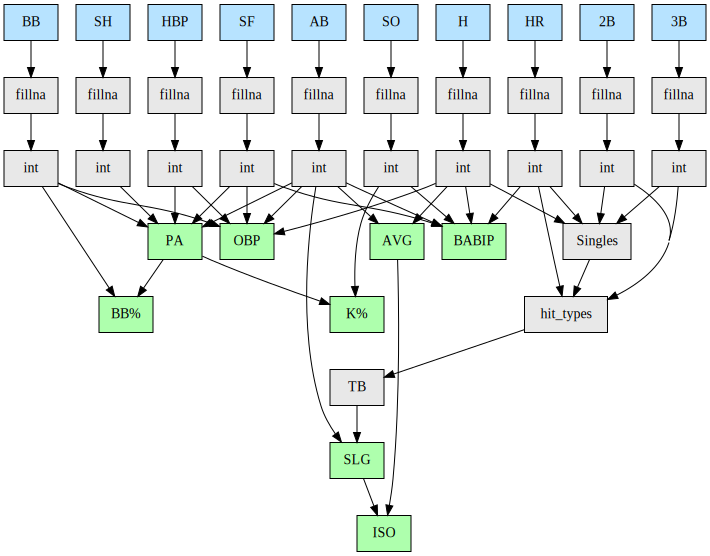

In [6]:
megatron.visuals.pipeline_imsave(P, 'img/sabermetrics.png')
megatron.visuals.pipeline_imshow(P)